# <center>Predicting India's 2024 Election Results using Advanced Analytics

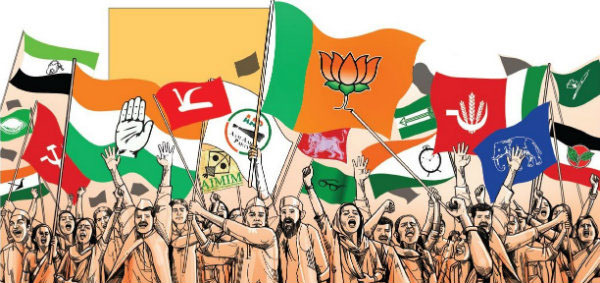

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# 

### Business Objective:

The primary objective of this project is to accurately predict the outcomes of India's 2024 election using past data and demographics. By using advanced data analytics and machine learning, the project will utilize data from EVM votes, postal votes and overall percentages to gain insights into future election results.

# 

## Step 1- Importing Libraries:

#### Importing essential libraries for Python Data Analysis

In [148]:
#Basic Operations 
import numpy as np
import pandas as pd
import datetime as dt

#visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 

## Step 2- Loading and Checking the structure of the Data:

#### Load your dataset into python notebook with pandas DataFrame

In [149]:
election_data = pd.read_csv("C:/Users/Rasika/OneDrive/Desktop/Edubridge/Capstone Project/Data/GE_2024_Results.csv")

#### Displaying the first few rows of the data

In [150]:
election_data.head(2)

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost


#### Displaying the dimensions of the data

In [151]:
election_data.shape

(8902, 10)

#### Checking the data types of each column

In [152]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            8902 non-null   int64 
 1   State         8902 non-null   object
 2   Constituency  8902 non-null   object
 3   Candidate     8902 non-null   object
 4   Party         8902 non-null   object
 5   EVM Votes     8902 non-null   object
 6   Postal Votes  8902 non-null   object
 7   Total Votes   8902 non-null   int64 
 8   % of Votes    8902 non-null   object
 9   Result        8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


# 

## Step 3- Data Preparation:

### 3.1 Naming Convention:

#### Checking if variables names are following the Naming Convention

In [153]:
election_data.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

#### Using list comprehension for replacing spaces in column names with _ (underscores) in column names of the data according to naming convention

In [154]:
election_data.columns = [col.replace(' ','_') for col in election_data.columns]

In [155]:
election_data.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM_Votes',
       'Postal_Votes', 'Total_Votes', '%_of_Votes', 'Result'],
      dtype='object')

#### Renaming column with special character (%)

In [156]:
election_data = election_data.rename(columns = {'%_of_Votes':'Percentage_of_Votes'})

In [157]:
election_data.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM_Votes',
       'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes', 'Result'],
      dtype='object')

### 3.2 Replacing - (hyphen) with NULL in integer data values:

In [158]:
election_data.head(15)

,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost
5,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914,0.45,Lost
6,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719,0.36,Lost
7,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542,0.27,Lost
8,9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506,1,507,0.25,Lost
9,10,Andaman & Nicobar Islands,Andaman & Nicobar Islands,USHA KUMARI,Independent,378,2,380,0.19,Lost


In [159]:
election_data.isna().sum()

ID                     0
State                  0
Constituency           0
Candidate              0
Party                  0
EVM_Votes              0
Postal_Votes           0
Total_Votes            0
Percentage_of_Votes    0
Result                 0
dtype: int64

#### Treating the values with - (hyphen) as nulls, pass the values as NULL instead of - (hyphen)

In [160]:
election_data['EVM_Votes'] = election_data['EVM_Votes'].replace('-',None)

In [161]:
election_data['Postal_Votes'] = election_data['Postal_Votes'].replace('-',None)

In [162]:
election_data['Percentage_of_Votes'] = election_data['Percentage_of_Votes'].replace('-',None)

In [163]:
election_data.head(15)

,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost
5,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914,0.45,Lost
6,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719,0.36,Lost
7,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542,0.27,Lost
8,9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506,1,507,0.25,Lost
9,10,Andaman & Nicobar Islands,Andaman & Nicobar Islands,USHA KUMARI,Independent,378,2,380,0.19,Lost


In [164]:
election_data.isna().sum()

ID                       0
State                    0
Constituency             0
Candidate                0
Party                    0
EVM_Votes                1
Postal_Votes           578
Total_Votes              0
Percentage_of_Votes      1
Result                   0
dtype: int64

### 3.3 Datatype Conversion:

#### Check the variable information

In [165]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8902 non-null   int64 
 1   State                8902 non-null   object
 2   Constituency         8902 non-null   object
 3   Candidate            8902 non-null   object
 4   Party                8902 non-null   object
 5   EVM_Votes            8901 non-null   object
 6   Postal_Votes         8324 non-null   object
 7   Total_Votes          8902 non-null   int64 
 8   Percentage_of_Votes  8901 non-null   object
 9   Result               8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


#### Converting datatypes

In [166]:
election_data['EVM_Votes'] = election_data['EVM_Votes'].astype('float')
election_data['Postal_Votes'] = election_data['Postal_Votes'].astype('float')
election_data['Percentage_of_Votes'] = election_data['Percentage_of_Votes'].astype('float')
election_data['ID'] = election_data['ID'].astype('object')

In [167]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8902 non-null   object 
 1   State                8902 non-null   object 
 2   Constituency         8902 non-null   object 
 3   Candidate            8902 non-null   object 
 4   Party                8902 non-null   object 
 5   EVM_Votes            8901 non-null   float64
 6   Postal_Votes         8324 non-null   float64
 7   Total_Votes          8902 non-null   int64  
 8   Percentage_of_Votes  8901 non-null   float64
 9   Result               8902 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 695.6+ KB


#### Checking the summary statistics

In [168]:
election_data.describe()

,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes
count,8.901000e+03,8324.000000,8.902000e+03,8901.000000
mean,7.208392e+04,449.844786,7.249646e+04,6.089172
std,1.788797e+05,1380.591598,1.798988e+05,14.630761
min,5.800000e+01,1.000000,0.000000e+00,0.010000
25%,1.085000e+03,4.000000,1.094250e+03,0.090000
50%,2.769000e+03,11.000000,2.781000e+03,0.240000
75%,9.681000e+03,59.000000,9.759500e+03,0.810000
max,1.468549e+06,19827.000000,1.471885e+06,78.540000


### 3.4 Data Duplicacy:

#### Checking the relevant and irrelevant variables in the first phase of EDA

- Checking cardinality (uniqueness) of data

In [169]:
election_data.nunique()

ID                     8902
State                    36
Constituency            541
Candidate              8101
Party                   746
EVM_Votes              6080
Postal_Votes           1446
Total_Votes            6100
Percentage_of_Votes    1556
Result                    2
dtype: int64

In [170]:
election_data.duplicated().value_counts()

False    8902
Name: count, dtype: int64

In [171]:
election_data.duplicated().sum()

0

- There are 0 duplicate rows in the election dataset

# 

## Step 4- Handling Missing Values:

In [172]:
election_data.shape

(8902, 10)

#### Checking the number of missing values in our data

In [173]:
election_data.isna().sum()

ID                       0
State                    0
Constituency             0
Candidate                0
Party                    0
EVM_Votes                1
Postal_Votes           578
Total_Votes              0
Percentage_of_Votes      1
Result                   0
dtype: int64

- There is maximum of 6.5% values missing in the Postal_Votes variable

In [174]:
election_data.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM_Votes',
       'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes', 'Result'],
      dtype='object')

#### Filling missing values with median value of respective variables

In [175]:
election_data['EVM_Votes'] = election_data['EVM_Votes'].fillna(election_data['EVM_Votes'].median())
election_data['Postal_Votes'] = election_data['Postal_Votes'].fillna(election_data['Postal_Votes'].median())
election_data['Percentage_of_Votes'] = election_data['Percentage_of_Votes'].fillna(election_data['Percentage_of_Votes'].median())

In [176]:
election_data.isna().sum()

ID                     0
State                  0
Constituency           0
Candidate              0
Party                  0
EVM_Votes              0
Postal_Votes           0
Total_Votes            0
Percentage_of_Votes    0
Result                 0
dtype: int64

# 

## Step 5- Data PreProcessing:

#### Separating the Categorical variables and Numerical variables into two different datasets for Data Preparations for easier analysis.

In [177]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8902 non-null   object 
 1   State                8902 non-null   object 
 2   Constituency         8902 non-null   object 
 3   Candidate            8902 non-null   object 
 4   Party                8902 non-null   object 
 5   EVM_Votes            8902 non-null   float64
 6   Postal_Votes         8902 non-null   float64
 7   Total_Votes          8902 non-null   int64  
 8   Percentage_of_Votes  8902 non-null   float64
 9   Result               8902 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 695.6+ KB


#### Categorical Election data

In [178]:
cat = [var for var in election_data.columns if election_data[var].dtype == 'O']
categorical_election_data = election_data[cat]

In [179]:
categorical_election_data.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'Result'], dtype='object')

In [180]:
categorical_election_data.isna().sum()

ID              0
State           0
Constituency    0
Candidate       0
Party           0
Result          0
dtype: int64

In [181]:
categorical_election_data.head(2)

,ID,State,Constituency,Candidate,Party,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,Lost


In [182]:
categorical_election_data.shape

(8902, 6)

#### Numerical Election data

In [183]:
num = [var for var in election_data.columns if election_data[var].dtype != 'O']
numerical_election_data = election_data[num]

In [184]:
numerical_election_data.columns

Index(['EVM_Votes', 'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes'], dtype='object')

In [185]:
numerical_election_data.isna().sum()

EVM_Votes              0
Postal_Votes           0
Total_Votes            0
Percentage_of_Votes    0
dtype: int64

In [186]:
numerical_election_data.head(2)

,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes
0,102182.0,254.0,102436,50.58
1,77829.0,211.0,78040,38.54


#### For merging the datasets back later, there should be a common column between the 2 seperated datasets

In [187]:
numerical_election_data['ID'] = election_data['ID']

C:\Users\Rasika\AppData\Local\Temp\ipykernel_13380\571422690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_election_data['ID'] = election_data['ID']


In [188]:
numerical_election_data.head(2)

,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,ID
0,102182.0,254.0,102436,50.58,1
1,77829.0,211.0,78040,38.54,2


In [189]:
numerical_election_data.shape

(8902, 5)

# 

## Step 6- Handling Outlier:

#### Observing columns for the outliers:

In [190]:
numerical_election_data.head()

,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,ID
0,102182.0,254.0,102436,50.58,1
1,77829.0,211.0,78040,38.54,2
2,8236.0,18.0,8254,4.08,3
3,6009.0,8.0,6017,2.97,4
4,2195.0,8.0,2203,1.09,5


In [191]:
numerical_election_data.describe()

,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes
count,8.902000e+03,8902.000000,8.902000e+03,8902.000000
mean,7.207613e+04,421.350932,7.249646e+04,6.088515
std,1.788711e+05,1339.386347,1.798988e+05,14.630071
min,5.800000e+01,1.000000,0.000000e+00,0.010000
25%,1.085250e+03,4.000000,1.094250e+03,0.090000
50%,2.769000e+03,11.000000,2.781000e+03,0.240000
75%,9.677000e+03,49.000000,9.759500e+03,0.810000
max,1.468549e+06,19827.000000,1.471885e+06,78.540000


#### Calculating interquartile range (IQR) and upper-lower bounds for numerical data

In [192]:
Q1 = numerical_election_data.quantile(0.25)
Q3 = numerical_election_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#### Potential outliers in numerical variables

In [193]:
potential_outliers = ((numerical_election_data < lower_bound) | (numerical_election_data > upper_bound)).sum()
print("Potential Outliers:\n", potential_outliers)

Potential Outliers:
 EVM_Votes              1620
Postal_Votes           1700
Total_Votes            1619
Percentage_of_Votes    1644
ID                        0
dtype: int64


#### Observing boxplot for numerical dataset

- In a box plot, potential outliers are typically represented as individual points that fall outside the whiskers of the plot.
- The whiskers of the box plot extend to the smallest and largest data points within a certain range from the lower and upper quartiles.

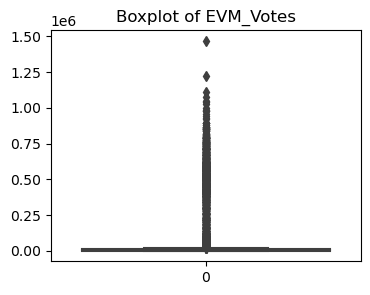

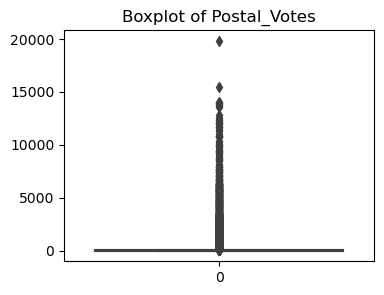

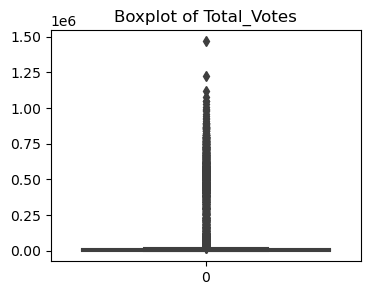

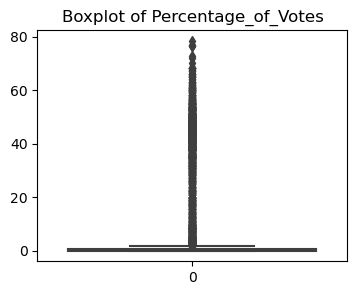

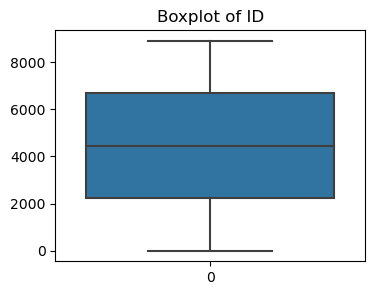

In [194]:
for col in numerical_election_data:
    plt.figure(figsize=(4, 3))
    sns.boxplot(numerical_election_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- In election data, outliers are less common because predicting which party or candidate will recieve the most or least votes can be unpredictable due to factors like voter sentiment and local issues.
- Outliers are not treated because they are numerous and appear to be accurate as per manual observation.
- Removing the outliers will negatively impact the overall data analysis.

# 

## Step 7- Merging the categorical and the numerical data to get the dataset:

In [195]:
numerical_election_data.columns

Index(['EVM_Votes', 'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes',
       'ID'],
      dtype='object')

In [196]:
categorical_election_data.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'Result'], dtype='object')

#### Merging categorical and numerical dataset based on the common column

In [197]:
election_data_merged = pd.merge(categorical_election_data,numerical_election_data,how = 'inner',left_on = 'ID',right_on = 'ID')

In [198]:
election_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8902 non-null   object 
 1   State                8902 non-null   object 
 2   Constituency         8902 non-null   object 
 3   Candidate            8902 non-null   object 
 4   Party                8902 non-null   object 
 5   Result               8902 non-null   object 
 6   EVM_Votes            8902 non-null   float64
 7   Postal_Votes         8902 non-null   float64
 8   Total_Votes          8902 non-null   int64  
 9   Percentage_of_Votes  8902 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 695.6+ KB


# 

## Step 8- One Hot Encoding (Conversion of categorical variables to continuous variables):

In [199]:
election_data_merged.nunique()

ID                     8902
State                    36
Constituency            541
Candidate              8101
Party                   746
Result                    2
EVM_Votes              6080
Postal_Votes           1446
Total_Votes            6100
Percentage_of_Votes    1556
dtype: int64

In [200]:
election_data_merged.Result.nunique()

2

In [201]:
election_data_merged_copy = election_data_merged.copy()

#### Transforming categorical variables into numerical format

In [202]:
election_data_merged_copy = pd.get_dummies(election_data_merged_copy,columns = ['Result'], dtype=int)

In [203]:
election_data_merged_copy.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM_Votes',
       'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes', 'Result_Lost',
       'Result_Won'],
      dtype='object')

In [204]:
election_data_merged_copy.head(20)

,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,Result_Lost,Result_Won
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436,50.58,0,1
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040,38.54,1,0
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254,4.08,1,0
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017,2.97,1,0
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203,1.09,1,0
5,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911.0,3.0,914,0.45,1,0
6,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714.0,5.0,719,0.36,1,0
7,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539.0,3.0,542,0.27,1,0
8,9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506.0,1.0,507,0.25,1,0
9,10,Andaman & Nicobar Islands,Andaman & Nicobar Islands,USHA KUMARI,Independent,378.0,2.0,380,0.19,1,0


# 

## Step 9- Visualizing Data:

### 9.1 Univariate analysis:

#### Bar charts for discrete data

- 9.1.1 Distribution of number of Candidates per State

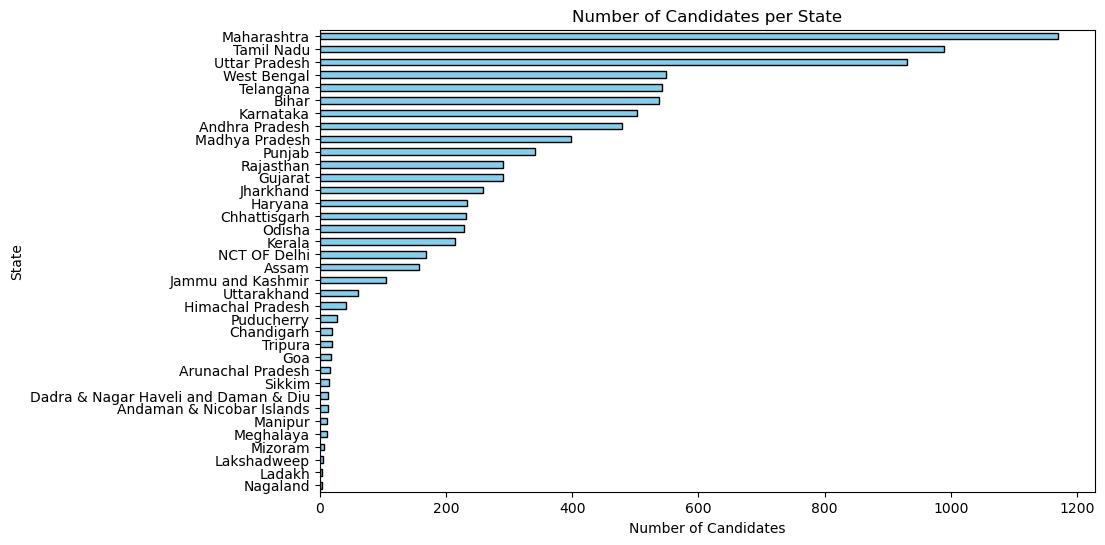

In [205]:
plt.figure(figsize=(10, 6))
election_data_merged_copy['State'].value_counts(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Number of Candidates per State')
plt.xlabel('Number of Candidates')
plt.ylabel('State')
plt.show()

- 9.1.2 Distribution of Total Votes per State

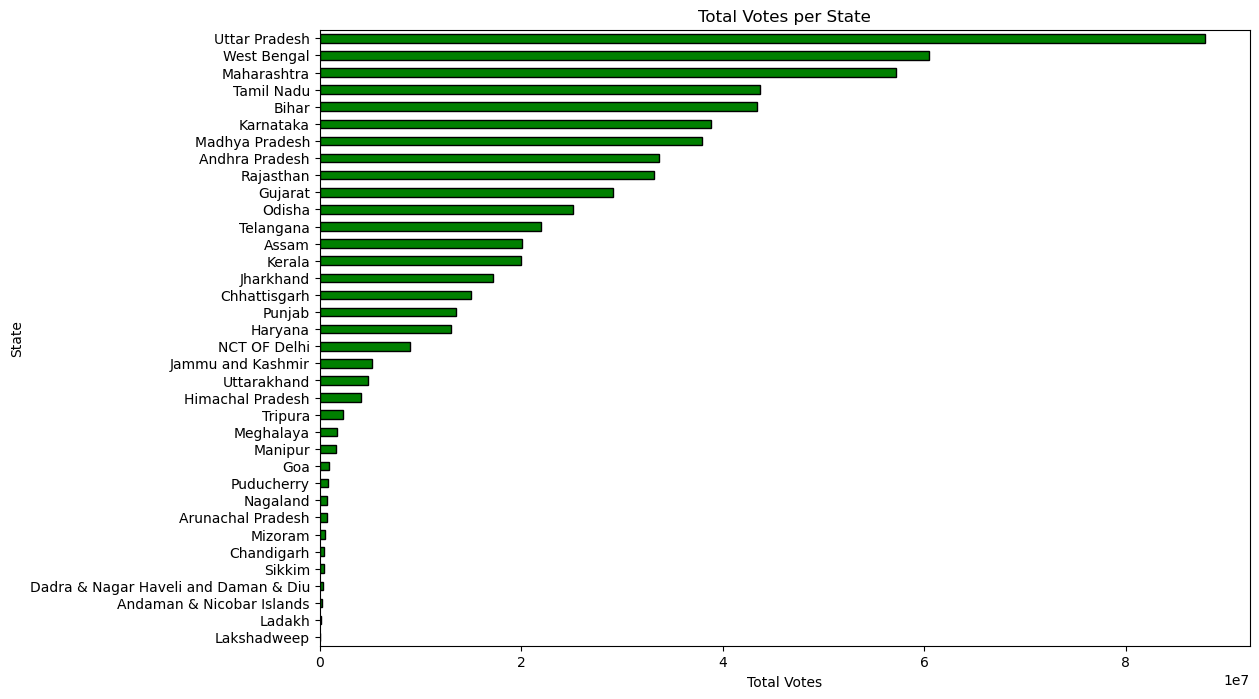

In [206]:
plt.figure(figsize=(12, 8))
election_data_merged_copy.groupby('State')['Total_Votes'].sum().sort_values(ascending=True).plot(kind='barh', color='green', edgecolor='black')
plt.title('Total Votes per State')
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.show()

- 9.1.3 Distribution of Total Votes per Party

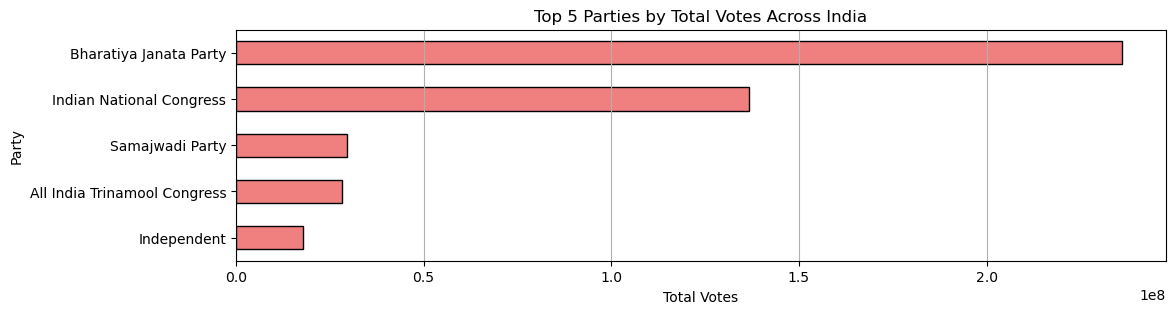

In [207]:
plt.figure(figsize=(12, 3))
election_data_merged_copy.groupby('Party')['Total_Votes'].sum().nlargest(5).sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Top 5 Parties by Total Votes Across India')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.grid(axis='x')
plt.show()

#### Pie charts for categorical breakdowns

- 9.1.4 Distribution of Election Results

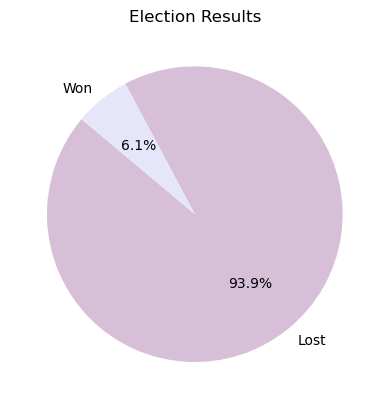

In [208]:
plt.pie(election_data_merged['Result'].value_counts(), labels=['Lost', 'Won'], autopct='%1.1f%%', startangle=140,colors=['thistle', 'lavender'])
plt.title('Election Results')
plt.show()

#### Histograms for continuous data

- 9.1.5 Distribution of Percentage of Votes 

<Axes: xlabel='Percentage_of_Votes', ylabel='Count'>

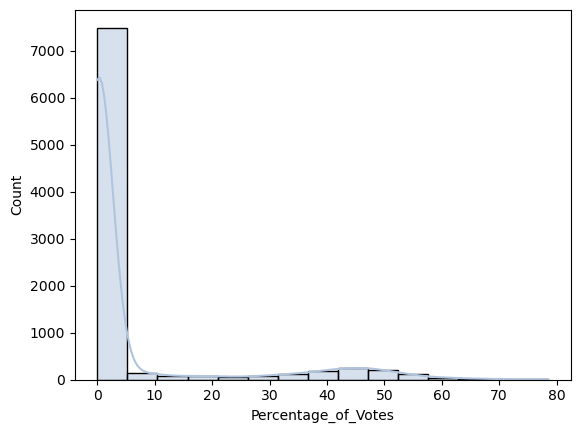

In [209]:
sns.histplot(election_data_merged_copy['Percentage_of_Votes'], bins=15, kde=True, color='lightsteelblue')

### 9.2 Bivariate analysis:

- 9.2.1 Distribution of Number of Wins and Losses by State

<Figure size 1200x800 with 0 Axes>

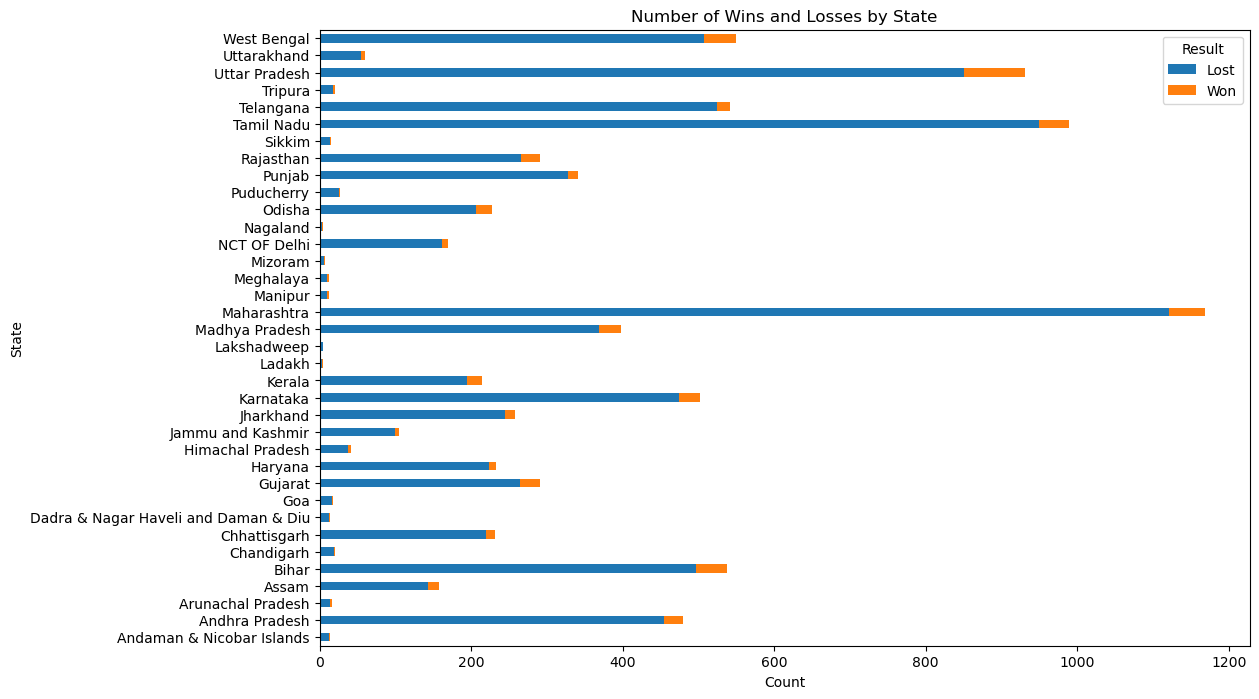

In [210]:
plt.figure(figsize=(12, 8))
election_data_merged.groupby(['State', 'Result']).size().unstack().plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Number of Wins and Losses by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.xticks(rotation=0)
plt.legend(title='Result')
plt.show()

- 9.2.2 Scatter Plot of Percentage votes against Total votes with Result Correlation

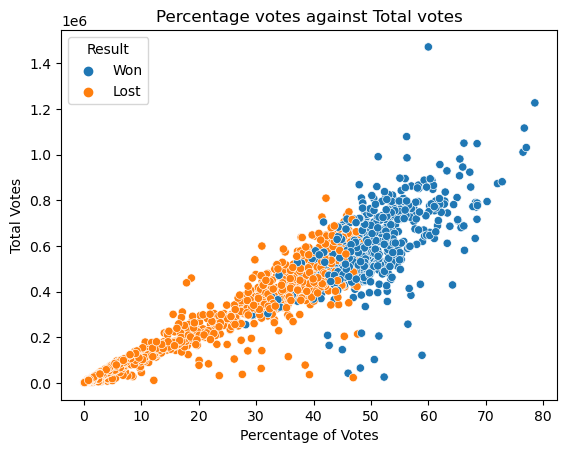

In [211]:
sns.scatterplot(x=election_data_merged.Percentage_of_Votes,y=election_data_merged.Total_Votes, hue=election_data_merged['Result'])
plt.xlabel('Percentage of Votes')
plt.ylabel('Total Votes')
plt.title('Percentage votes against Total votes')
plt.show()

### 9.3 Multivariate analysis:

#### Heatmap to visualize the intensity or magnitude of relationships between variables using color gradients

- 9.3.1 Correlation Heatmap of Voting Data

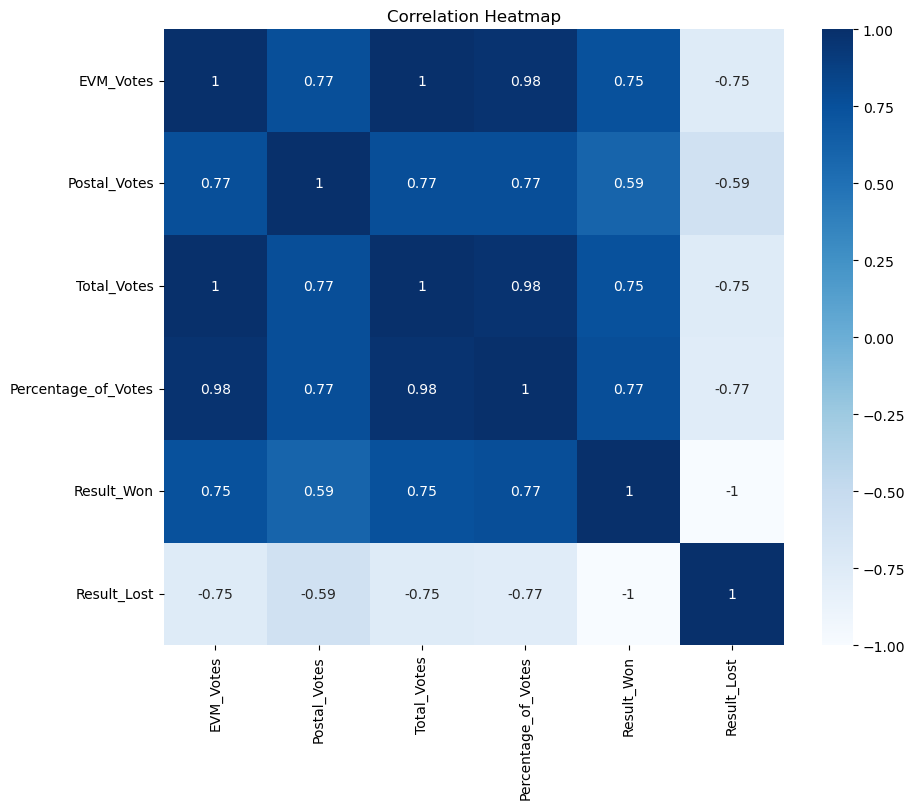

In [212]:
heatmap_data = election_data_merged_copy[['EVM_Votes', 'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes', 'Result_Won', 'Result_Lost']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Strong Positive Correlations:
- EVM Votes and Total Votes: There is a perfect correlation (correlation coefficient of 1) between EVM Votes and Total Votes, indicating that they vary in direct proportion with each other.
- Percentage of Votes with EVM Votes: There is a very high correlation (correlation coefficient of 0.98) between Percentage of Votes and EVM Votes, suggesting that EVM Votes strongly influence the Percentage of Votes.

# 

## Step 10- Feature Engineering: Correlation Analysis

In [213]:
election_data_merged_copy.head(10)

,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,Result_Lost,Result_Won
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436,50.58,0,1
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040,38.54,1,0
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254,4.08,1,0
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017,2.97,1,0
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203,1.09,1,0
5,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911.0,3.0,914,0.45,1,0
6,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714.0,5.0,719,0.36,1,0
7,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539.0,3.0,542,0.27,1,0
8,9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506.0,1.0,507,0.25,1,0
9,10,Andaman & Nicobar Islands,Andaman & Nicobar Islands,USHA KUMARI,Independent,378.0,2.0,380,0.19,1,0


In [214]:
election_data_ML = election_data_merged_copy.copy()

#### Setting Result Variable like Won=1, Lost=0

In [215]:
election_data_ML.drop(columns=['Result_Lost'], inplace=True)

In [216]:
election_data_ML = election_data_ML.rename(columns = {'Result_Won':'Result'})

In [217]:
election_data_ML.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM_Votes',
       'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes', 'Result'],
      dtype='object')

In [218]:
election_data_ML.head(50)

,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436,50.58,1
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040,38.54,0
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254,4.08,0
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017,2.97,0
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203,1.09,0
5,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911.0,3.0,914,0.45,0
6,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714.0,5.0,719,0.36,0
7,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539.0,3.0,542,0.27,0
8,9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506.0,1.0,507,0.25,0
9,10,Andaman & Nicobar Islands,Andaman & Nicobar Islands,USHA KUMARI,Independent,378.0,2.0,380,0.19,0


#### Define Features and Target:

In [219]:
election_data_ML.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM_Votes',
       'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes', 'Result'],
      dtype='object')

In [220]:
features = election_data_ML[['EVM_Votes', 'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes']]

In [221]:
features.columns

Index(['EVM_Votes', 'Postal_Votes', 'Total_Votes', 'Percentage_of_Votes'], dtype='object')

In [222]:
features.head(10)

,EVM_Votes,Postal_Votes,Total_Votes,Percentage_of_Votes
0,102182.0,254.0,102436,50.58
1,77829.0,211.0,78040,38.54
2,8236.0,18.0,8254,4.08
3,6009.0,8.0,6017,2.97
4,2195.0,8.0,2203,1.09
5,911.0,3.0,914,0.45
6,714.0,5.0,719,0.36
7,539.0,3.0,542,0.27
8,506.0,1.0,507,0.25
9,378.0,2.0,380,0.19


In [223]:
target = election_data_ML[['Result']]

In [224]:
target.columns

Index(['Result'], dtype='object')

In [225]:
target.head(10)

,Result
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Split train-test data

In [226]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

#### Standardization

In [227]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
performance = {}
confusion_matrices = {}

# 

## Step 11- Building Machine Learning Algorithms

### 11.1 Logistic Regression:

In [229]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
performance['Logistic Regression'] = accuracy_score(y_test, y_pred_log)
log_matrix = confusion_matrix(y_test, y_pred_log)

C:\Users\Rasika\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
print(f"Logistic Regression Accuracy: {performance['Logistic Regression']}")
print("Logistic Regresssion Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9797828528640958
Logistic Regresssion Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.86      0.82      0.84       171

    accuracy                           0.98      2671
   macro avg       0.92      0.90      0.91      2671
weighted avg       0.98      0.98      0.98      2671



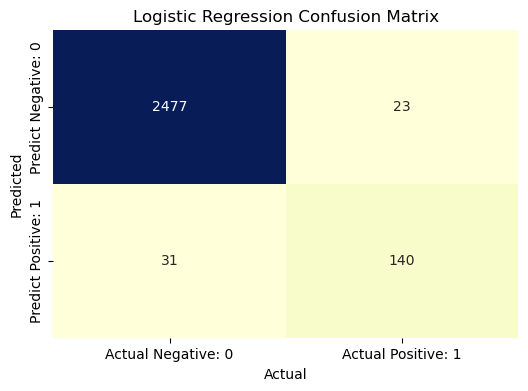

In [231]:
plt.figure(figsize=(6, 4))
sns.heatmap(log_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Actual Negative: 0', 'Actual Positive: 1'],
            yticklabels=['Predict Negative: 0', 'Predict Positive: 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 11.2 Decision Tree:

In [232]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
performance['Decision Tree'] = accuracy_score(y_test, y_pred_tree)
tree_matrix = confusion_matrix(y_test, y_pred_tree)

In [233]:
print(f"Decision Tree Accuracy: {performance['Decision Tree']}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.976787719955073
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.83      0.80      0.82       171

    accuracy                           0.98      2671
   macro avg       0.91      0.89      0.90      2671
weighted avg       0.98      0.98      0.98      2671



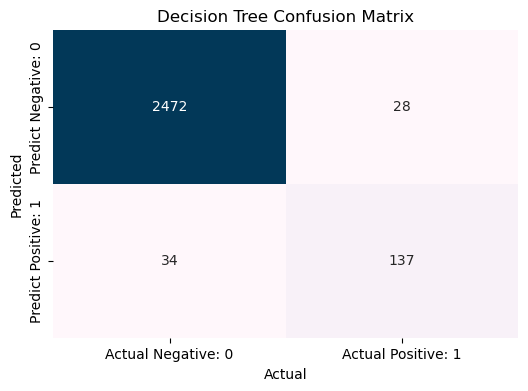

In [234]:
plt.figure(figsize=(6, 4))
sns.heatmap(tree_matrix, annot=True, fmt='d', cmap='PuBu', cbar=False,
            xticklabels=['Actual Negative: 0', 'Actual Positive: 1'],
            yticklabels=['Predict Negative: 0', 'Predict Positive: 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 11.3 Random Forest:

In [235]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
performance['Random Forest'] = accuracy_score(y_test, y_pred_rf)
rf_matrix = confusion_matrix(y_test, y_pred_rf)

C:\Users\Rasika\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [236]:
print(f"Random Forest Accuracy: {performance['Random Forest']}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9797828528640958
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.88      0.79      0.83       171

    accuracy                           0.98      2671
   macro avg       0.93      0.89      0.91      2671
weighted avg       0.98      0.98      0.98      2671



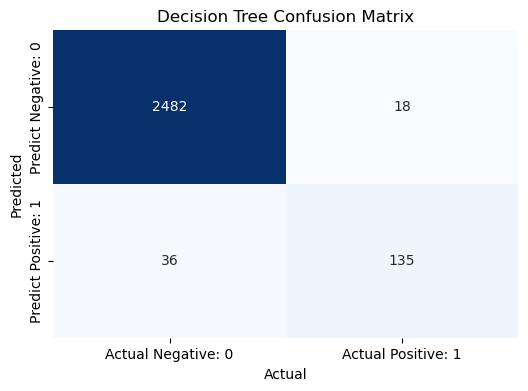

In [237]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative: 0', 'Actual Positive: 1'],
            yticklabels=['Predict Negative: 0', 'Predict Positive: 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 11.4 K-Nearest Neighbour:

In [238]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
performance['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred_knn)
knn_matrix = confusion_matrix(y_test, y_pred_knn)

C:\Users\Rasika\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [239]:
print(f"K-Nearest Neighbors Accuracy: {performance['K-Nearest Neighbors']}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.974166978659678
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.82      0.76      0.79       171

    accuracy                           0.97      2671
   macro avg       0.90      0.87      0.89      2671
weighted avg       0.97      0.97      0.97      2671



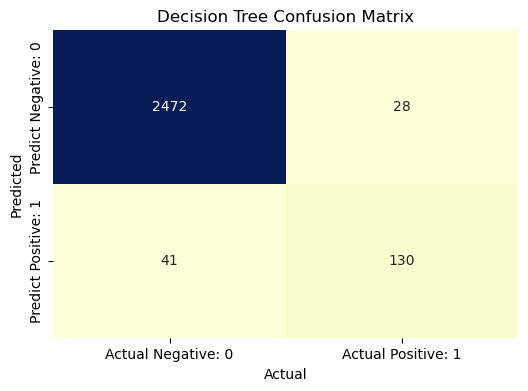

In [240]:
plt.figure(figsize=(6, 4))
sns.heatmap(knn_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Actual Negative: 0', 'Actual Positive: 1'],
            yticklabels=['Predict Negative: 0', 'Predict Positive: 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 11.5 Naive Bayes:

In [241]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
performance['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)
nb_matrix = confusion_matrix(y_test, y_pred_nb)

C:\Users\Rasika\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [242]:
print(f"Naive Bayes Performance: {performance['Naive Bayes']}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Performance: 0.9494571321602396
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2500
           1       0.56      0.98      0.71       171

    accuracy                           0.95      2671
   macro avg       0.78      0.96      0.84      2671
weighted avg       0.97      0.95      0.96      2671



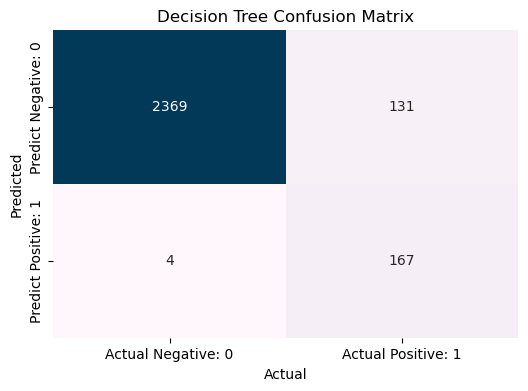

In [243]:
plt.figure(figsize=(6, 4))
sns.heatmap(nb_matrix, annot=True, fmt='d', cmap='PuBu', cbar=False,
            xticklabels=['Actual Negative: 0', 'Actual Positive: 1'],
            yticklabels=['Predict Negative: 0', 'Predict Positive: 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Step 12- Comparison of all Machine Learning Models

In [244]:
performance_df = pd.DataFrame(list(performance.items()), columns=['Model', 'Accuracy'])

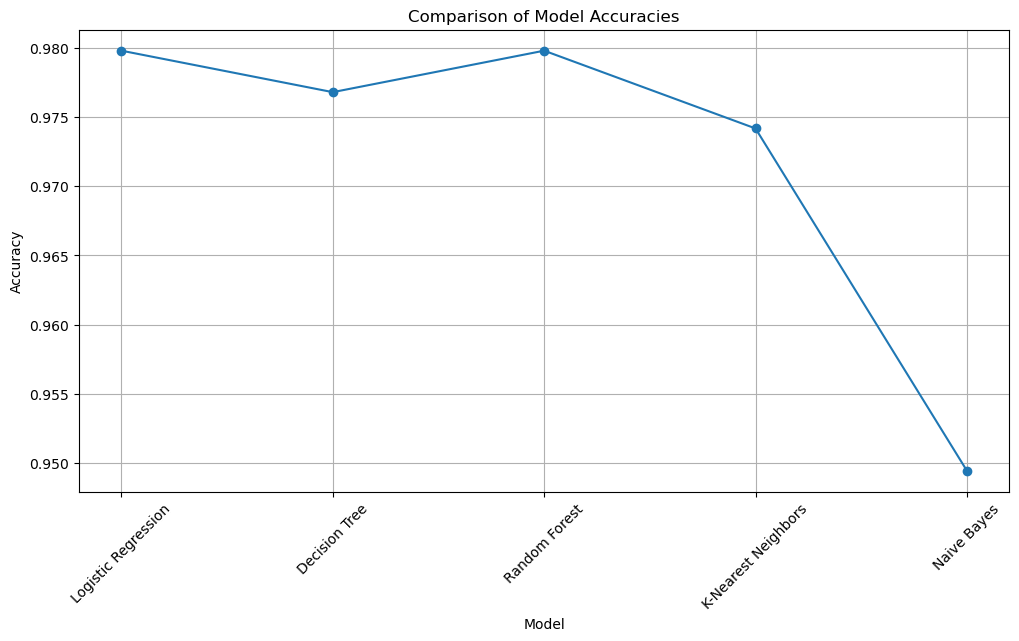

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(performance_df['Model'], performance_df['Accuracy'], marker='o', linestyle='-')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [246]:
print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression  0.979783
1        Decision Tree  0.976788
2        Random Forest  0.979783
3  K-Nearest Neighbors  0.974167
4          Naive Bayes  0.949457


#### Logistic Regression, Decision Tree, and Random Forest:

- Logistic Regression, Random Forest, and Decision Tree models perform very similarly with high accuracy scores around 97.7% to 97.9%.
- These models are well-suited for classification task, indicating robust performance in predicting election outcomes based on the given features and data.

### Conclusion

- Based on our analysis of the election data, we noticed clear voting trends across different areas, particularly regarding EVM and postal votes.
- This analysis highlighted that total votes play a crucial role in determining election outcomes.
- Among the models evaluated, the Logistic Regression and Random Forest Model demonstrated superior predictive accuracy in forecasting election results based on available data.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------